In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
import statsmodels.tsa.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set()

/Users/weixin/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Loading the base dataset

In [2]:
def tsplot(y, lags=50, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))    
        y.plot(ax=ts_ax)
        p_value = sm.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        sm.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        sm.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        plt.tight_layout()
    return

In [3]:
df = pd.read_excel("Data/NEER_Economic_Indicators.xlsx")
df.head()

date     neer  total_domestic_exports  f&b_sales  retail_sales_value  \
0 2021-01-11  114.565                22659044        607                3441   
1 2021-02-11  114.870                19710774        595                2553   
2 2021-03-11  114.925                24934088        604                3071   
3 2021-04-11  115.808                23029646        603                3063   
4 2021-05-11  116.310                22893768        643                3187   

   cpi_adjusted  total_merchandise_imports  total_merchandise_imports_food  \
0        90.214                   37583825                          699556   
1        90.261                   32126643                          482200   
2        90.341                   43060778                          698905   
3        91.316                   38518652                          740715   
4        91.182                   39756662                          632103   

   total_merchandise_imports_clothing&footwear  \
0                                       325890   
1                                       213601   
2                                       279169   
3                                       267183   
4                                       279040   

   total_merchandise_imports_plastics  
0                              526656  
1                              517289  
2                              765600  
3                              716861  
4                              611065

## Time series Analysis (Original)

### NEER

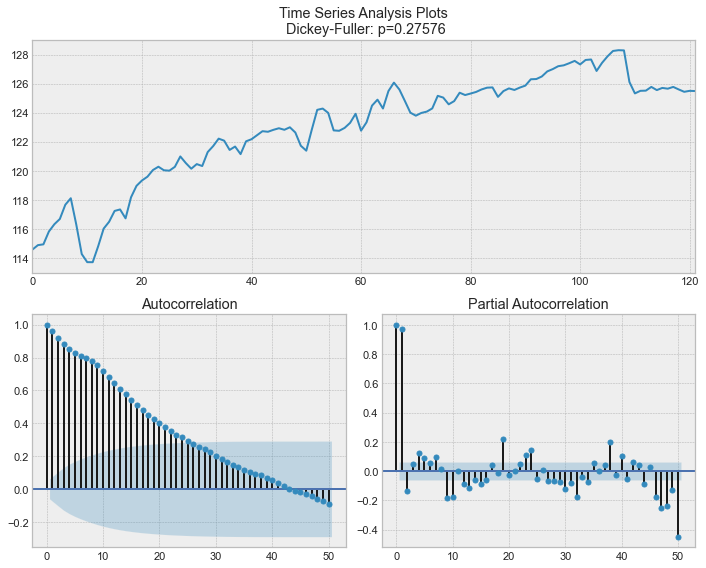

In [4]:
tsplot(df["neer"])

### Total Domestic Exports

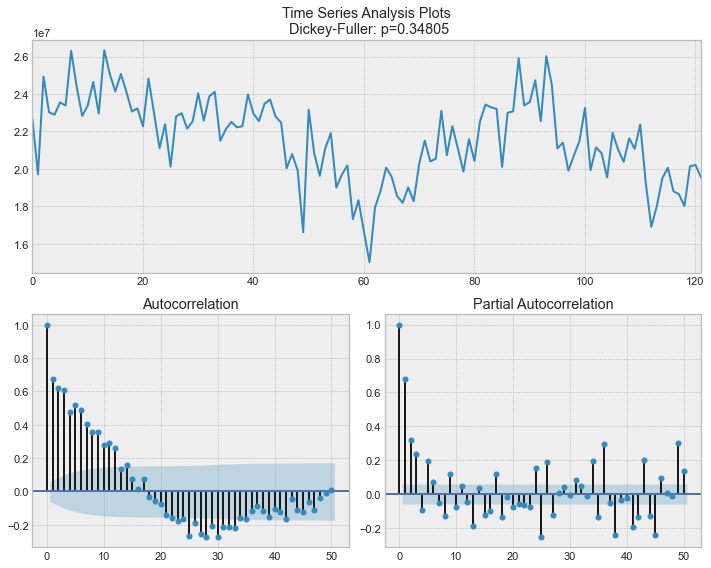

In [5]:
tsplot(df["total_domestic_exports"])

### Food and Beverage Sales

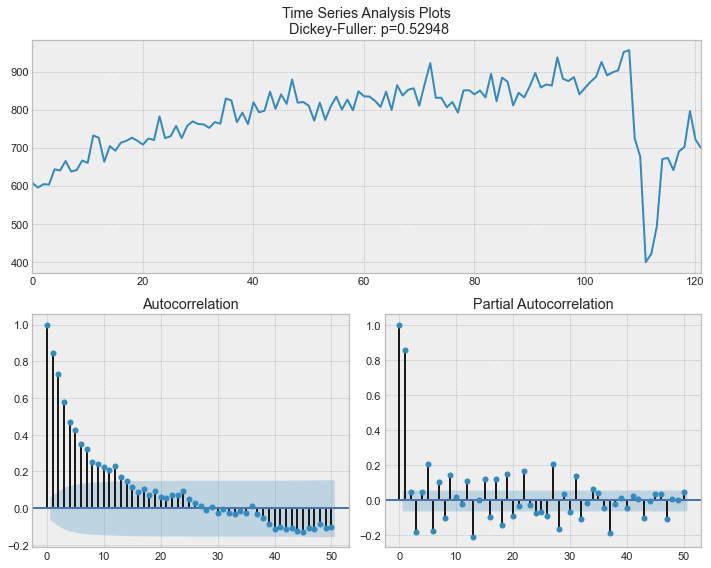

In [6]:
tsplot(df["f&b_sales"])

### Retail Sales

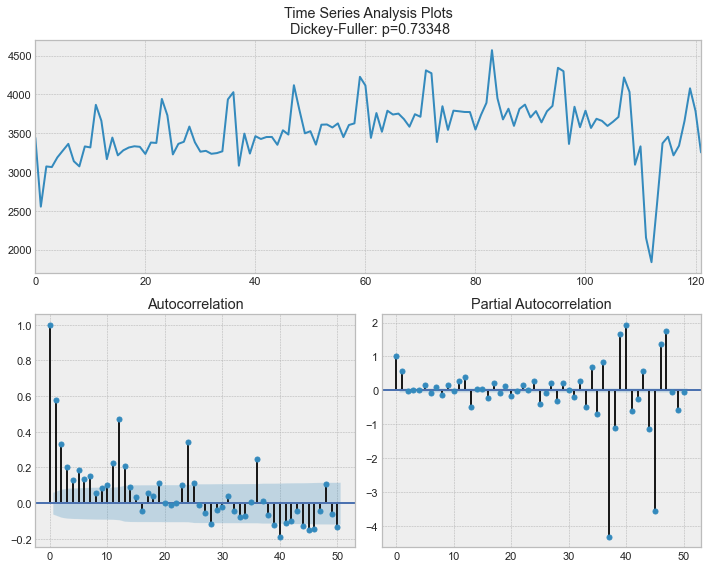

In [7]:
tsplot(df["retail_sales_value"])

### CPI Adjusted

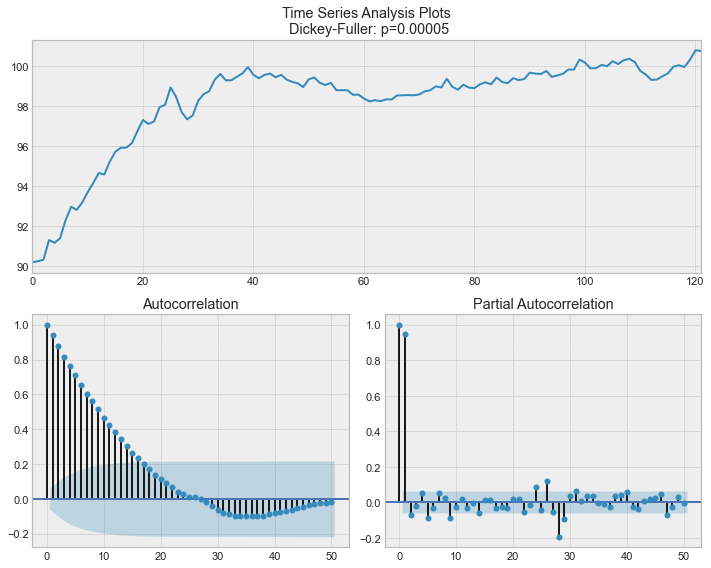

In [8]:
tsplot(df["cpi_adjusted"])

### Total Merchandise Imports

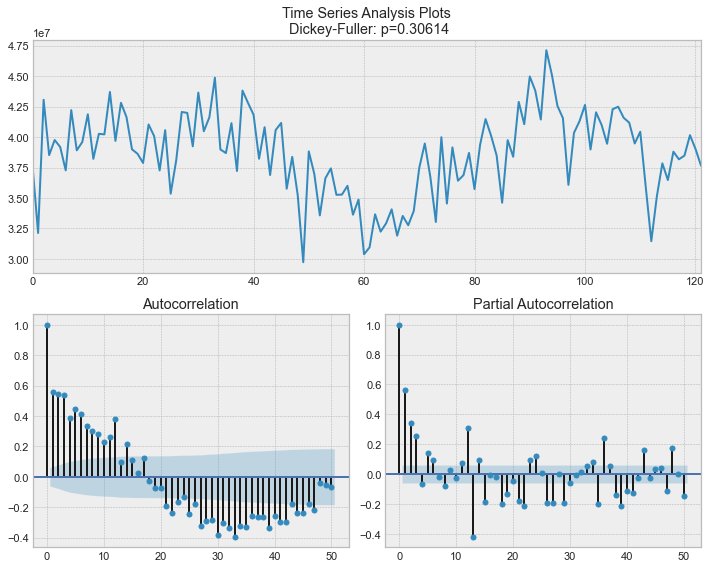

In [9]:
tsplot(df["total_merchandise_imports"])

## Time Series Analysis (Log Transformation)

In [10]:
focused_columns = ['neer','total_domestic_exports','f&b_sales','retail_sales_value','cpi_adjusted','total_merchandise_imports']
for column in focused_columns:
    if column in df.columns.values.tolist():
        df[column] = np.log(df[column]+1) 

### NEER (Log)

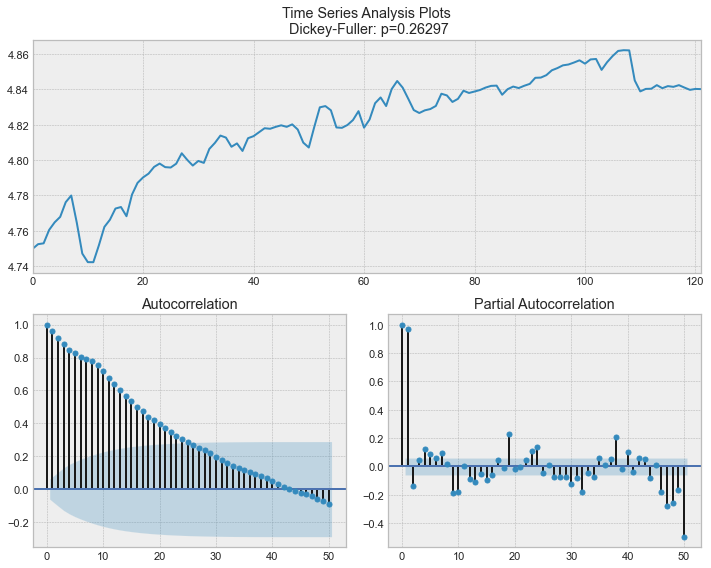

In [11]:
tsplot(df["neer"])

### Total Domestic Exports (Log)

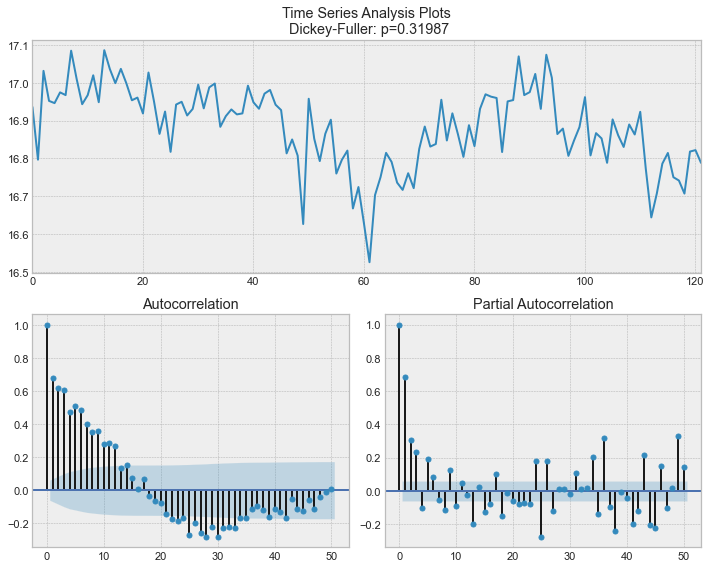

In [12]:
tsplot(df["total_domestic_exports"])

### Food and Beverage Sales (Log)

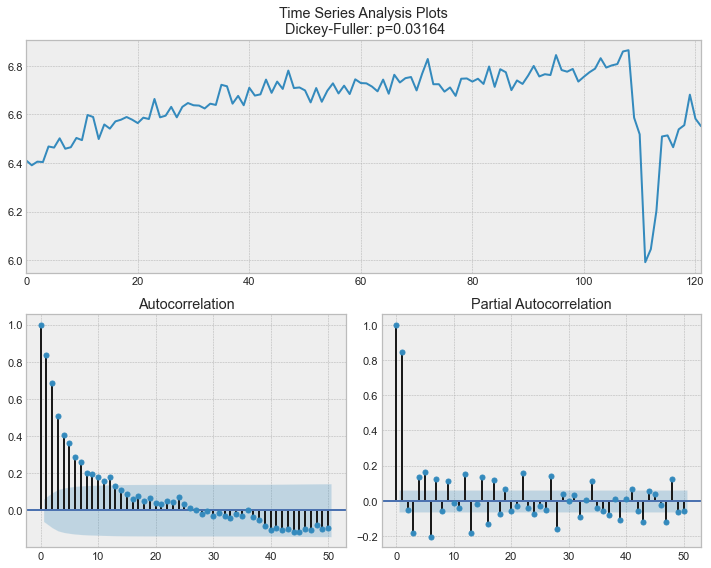

In [13]:
tsplot(df["f&b_sales"])

### Retail Sales (Log)

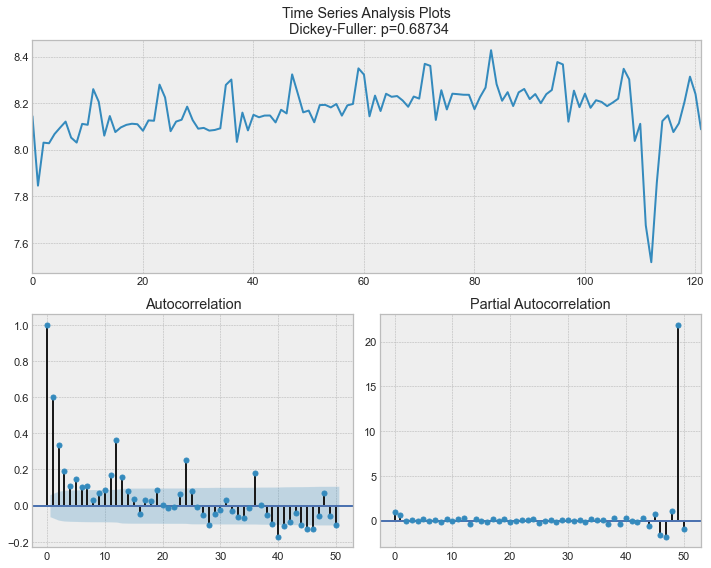

In [14]:
tsplot(df["retail_sales_value"])

### CPI Adjusted (Log)

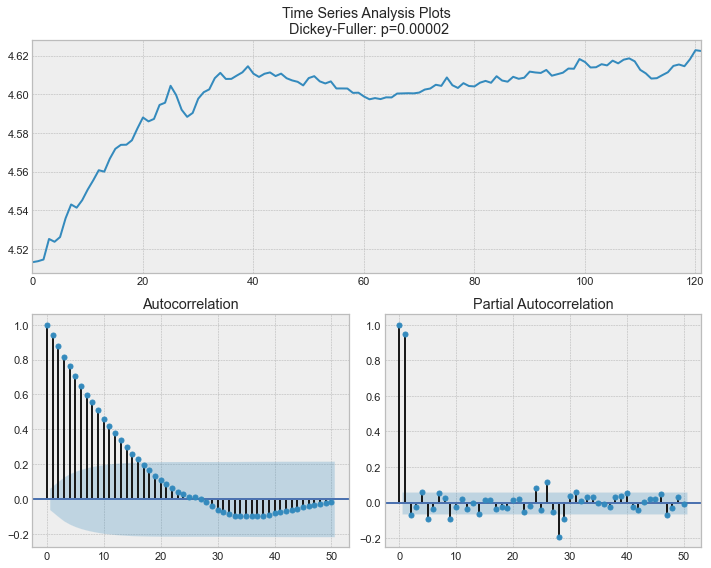

In [15]:
tsplot(df["cpi_adjusted"])

### Total Merchandise Imports (Log)

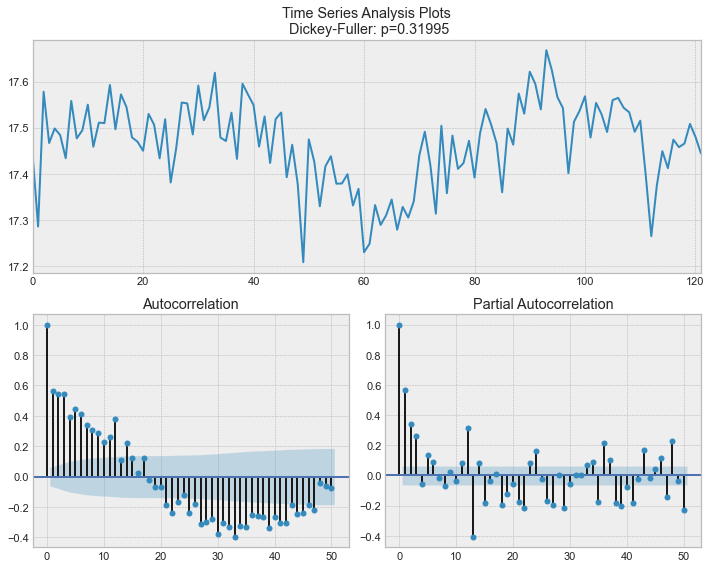

In [16]:
tsplot(df["total_merchandise_imports"])

## Differencing

In [17]:
focused_columns_diff = ['neer','total_domestic_exports','retail_sales_value','total_merchandise_imports']
for column in focused_columns_diff:
    if column in df.columns.values.tolist():
        df[column] = df[column].diff().dropna()

In [18]:
df = df.dropna()
df.head()

date      neer  total_domestic_exports  f&b_sales  retail_sales_value  \
1 2021-02-11  0.002636               -0.139394   6.390241           -0.298392   
2 2021-03-11  0.000475                0.235070   6.405228            0.184668   
3 2021-04-11  0.007588               -0.079454   6.403574           -0.002608   
4 2021-05-11  0.004288               -0.005918   6.467699            0.039673   
5 2021-06-11  0.003085                0.028445   6.463029            0.027229   

   cpi_adjusted  total_merchandise_imports  total_merchandise_imports_food  \
1      4.513724                  -0.156888                          482200   
2      4.514600                   0.292927                          698905   
3      4.525217                  -0.111470                          740715   
4      4.523765                   0.031635                          632103   
5      4.526214                  -0.014470                          705952   

   total_merchandise_imports_clothing&footwear  \
1                                       213601   
2                                       279169   
3                                       267183   
4                                       279040   
5                                       320052   

   total_merchandise_imports_plastics  
1                              517289  
2                              765600  
3                              716861  
4                              611065  
5                              553093

###  NEER (Log + Diff)

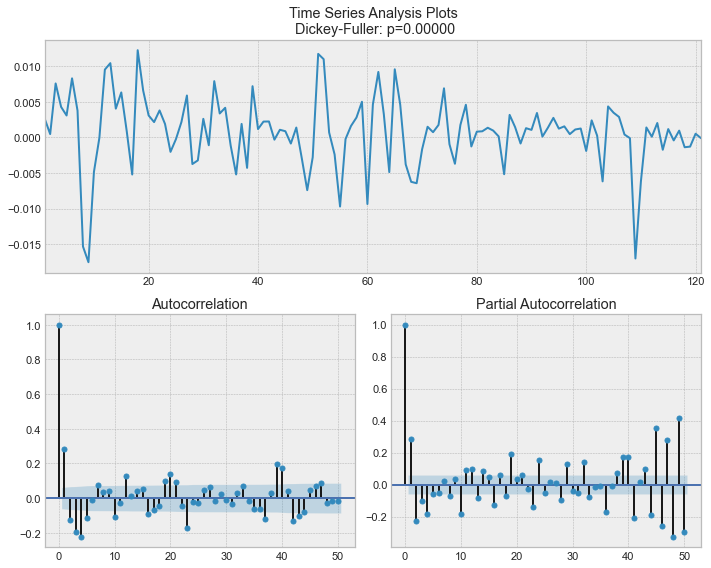

In [19]:
tsplot(df["neer"])

### Total Domestic Exports (Log + Diff)

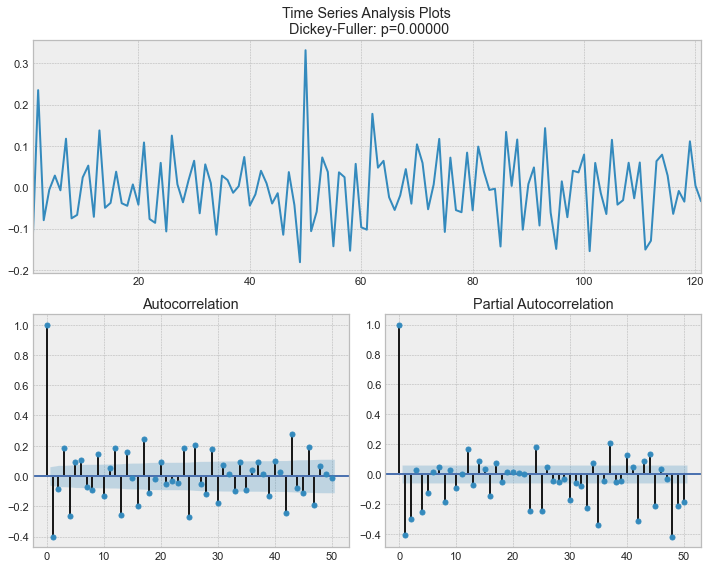

In [20]:
tsplot(df["total_domestic_exports"])

### Retail Sales (Log + Diff)

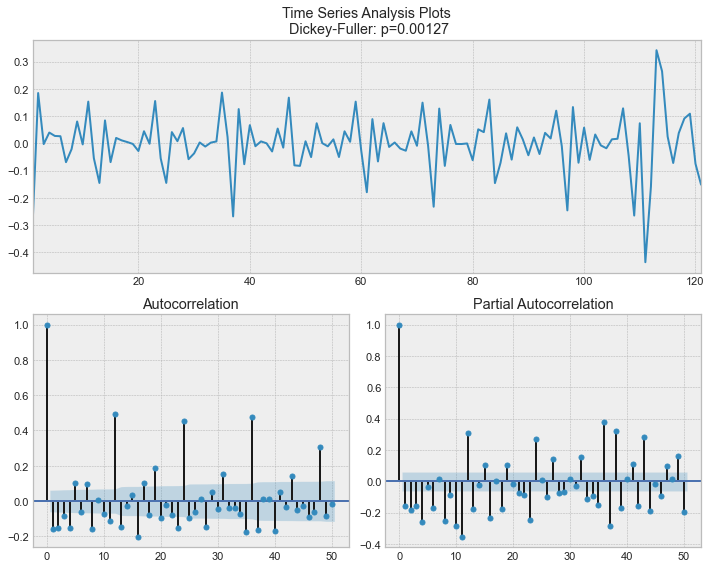

In [21]:
tsplot(df["retail_sales_value"])

### Total Merchandise Imports (Log + Diff)

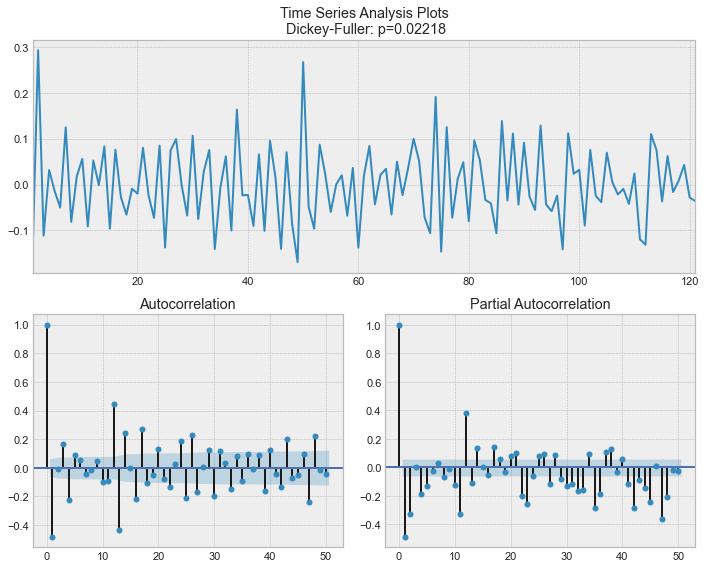

In [22]:
tsplot(df["total_merchandise_imports"])

In [23]:
model = VAR(df[focused_columns])
print(model.select_order(10).summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -39.19      -39.04   9.575e-18      -39.13
1       -44.39     -43.36*   5.283e-20     -43.97*
2       -44.65      -42.74  4.109e-20*      -43.87
3       -44.63      -41.85   4.231e-20      -43.50
4      -44.65*      -40.99   4.270e-20      -43.16
5       -44.34      -39.80   6.050e-20      -42.50
6       -44.32      -38.90   6.652e-20      -42.12
7       -44.08      -37.78   9.262e-20      -41.53
8       -43.99      -36.81   1.164e-19      -41.08
9       -44.01      -35.96   1.363e-19      -40.75
10      -44.36      -35.43   1.226e-19      -40.74
--------------------------------------------------


In [24]:
def write_results(file_name, results, columns):
    with open(file_name,"w") as fw:
        print(results.summary(), file=fw)
        fw.write("================test_whiteness================\n")
        print(results.test_whiteness(), file=fw)
        fw.write("================results.roots()================\n")
        for root in results.roots:
            fw.write(str(root)+",")
        fw.write("\n================is_stable================\n")
        fw.write(str(results.is_stable()))
        fw.write("\n================granger causality================\n")
        for V1 in columns:
            for V2 in columns:
                fw.write("Granger test: "+V2+"-->"+V1+"\n")
                print(results.test_causality(V1, [V2],kind='f').summary(), file=fw)
                fw.write("\n")

        fw.write("\n================long_run effects================\n")
        for effect in results.long_run_effects():
            fw.write(str(effect)+",")
        fw.write("\n================FEVD values================\n")
        print(results.fevd(20).summary,file=fw)

def structural_analyses(file_name, results, lag=20):

    # impulse response analyses
    irf = results.irf(lag)
    fig1 = irf.plot(orth=False)
    plt.savefig(file_name+"_irf_noorth.png")
    # irf.plot(impulse='V1', response="V2")
    fig2 = irf.plot_cum_effects(orth=False)
    plt.savefig(file_name+"_irf_cum_noorth.png")
    results.long_run_effects()

    col = sns.color_palette("hls", 11)
    # forecast error decomposition
    results.fevd(lag).plot()
    plt.savefig(file_name+"_fevd.png")
    fig1.set_figheight(20)
    fig1.set_figwidth(25)
    fig2.set_figheight(20)
    fig2.set_figwidth(25)

In [25]:
orders = [1, 2, 4]
for o in orders:
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 436.986, critical value: 366.977>, p-value: 0.000>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 326.091, critical value: 328.580>, p-value: 0.061>

Order: 4
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 236.940, critical value: 251.286>, p-value: 0.157>



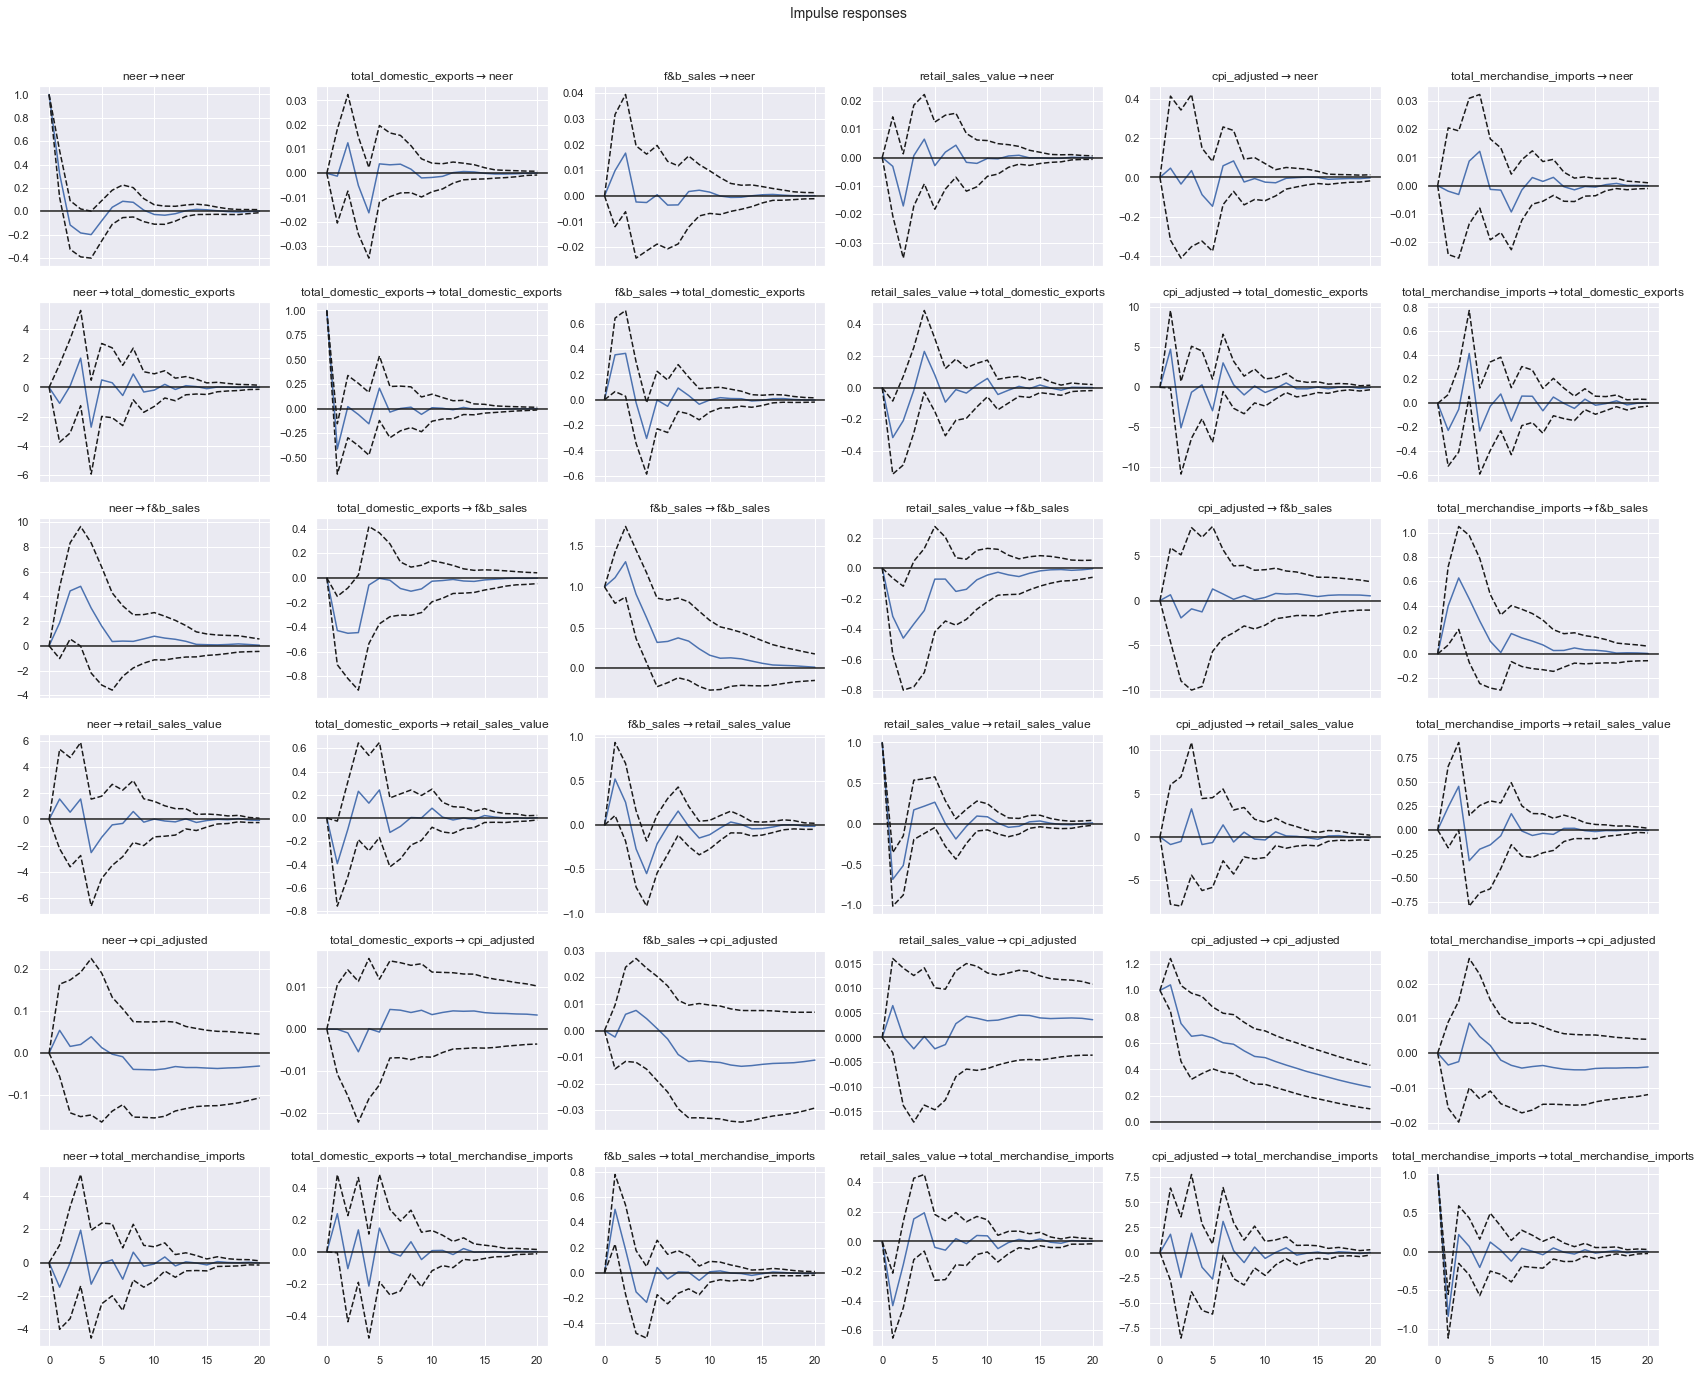

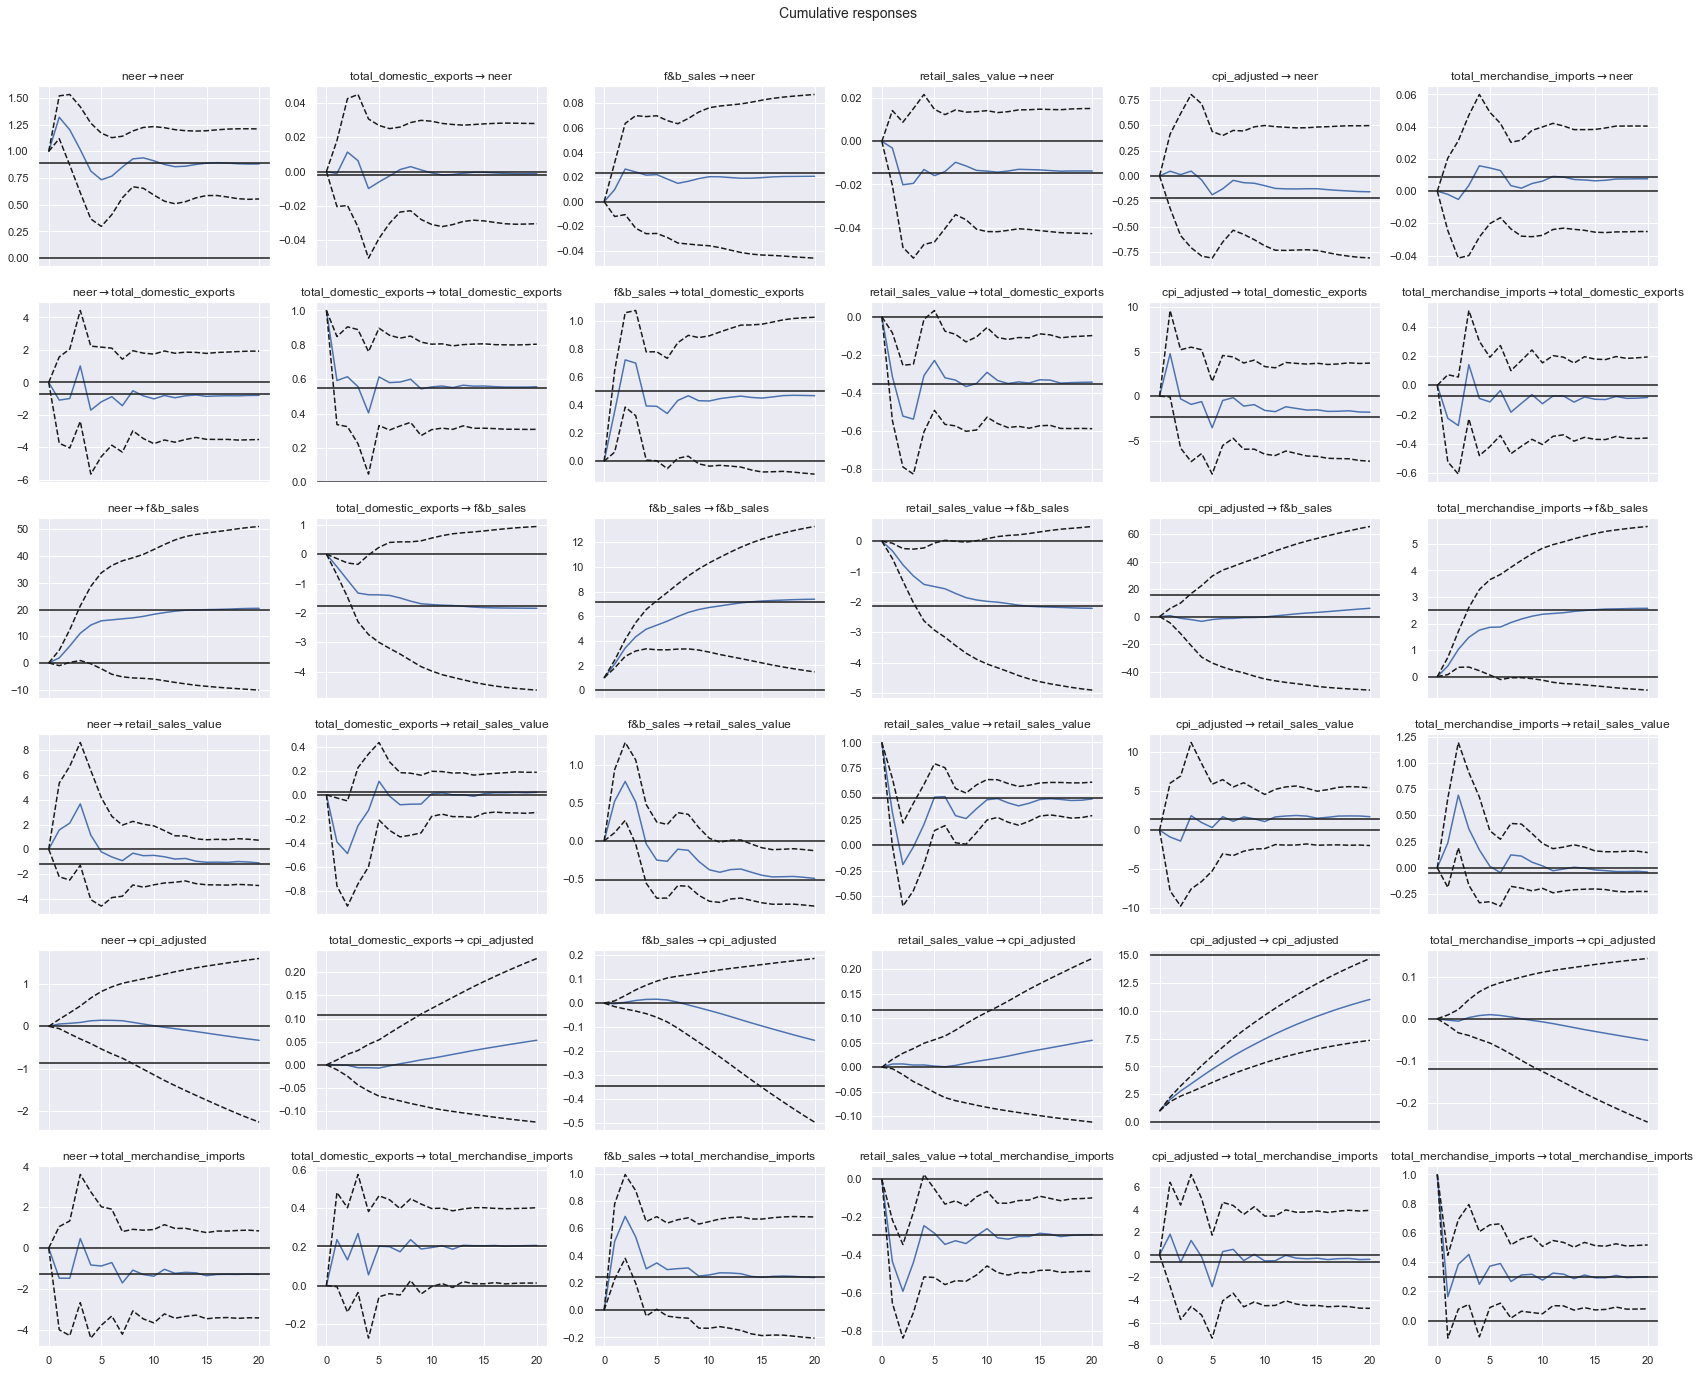

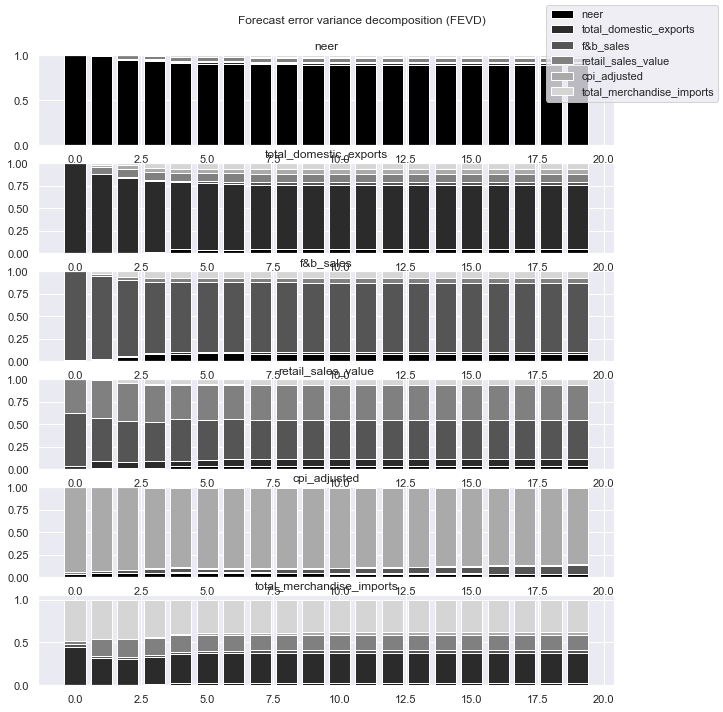

In [26]:
selecteed_order = 4
results = model.fit(selecteed_order,trend="c")
results_file = 'results_lag'+str(selecteed_order)+'.txt'
structual_file = 'lag'+str(selecteed_order)
columns = df[focused_columns].columns.values.tolist()
write_results(results_file, results, columns)
structural_analyses(structual_file, results, 20)

### Drilling down to specific merchandise import categories

In [27]:
df_imports = pd.read_excel("Data/totalmerchandise_imports.xlsx")
df_imports.head()

date     neer  total_merchandise_imports_food  \
0 2021-01-11  114.565                          699556   
1 2021-02-11  114.870                          482200   
2 2021-03-11  114.925                          698905   
3 2021-04-11  115.808                          740715   
4 2021-05-11  116.310                          632103   

   total_merchandise_imports_clothing&footwear  \
0                                       325890   
1                                       213601   
2                                       279169   
3                                       267183   
4                                       279040   

   total_merchandise_imports_plastics  
0                              526656  
1                              517289  
2                              765600  
3                              716861  
4                              611065

### Total Food Imports

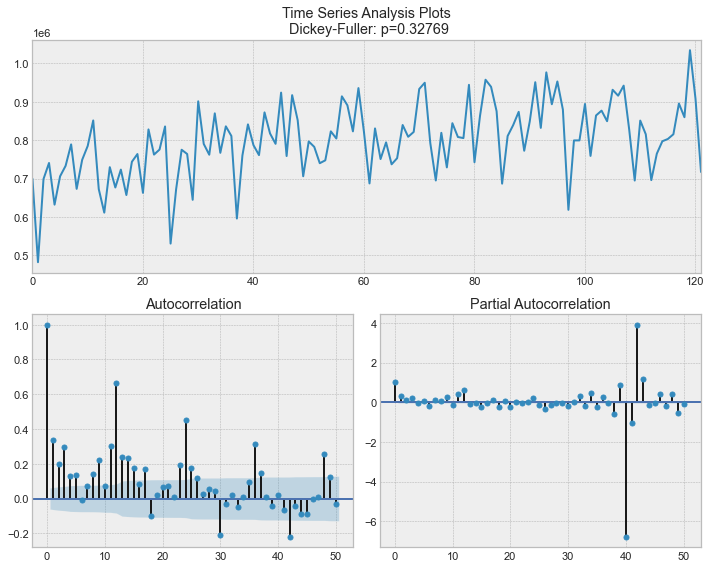

In [28]:
tsplot(df_imports["total_merchandise_imports_food"])

### Total Clothing and Footwear Imports

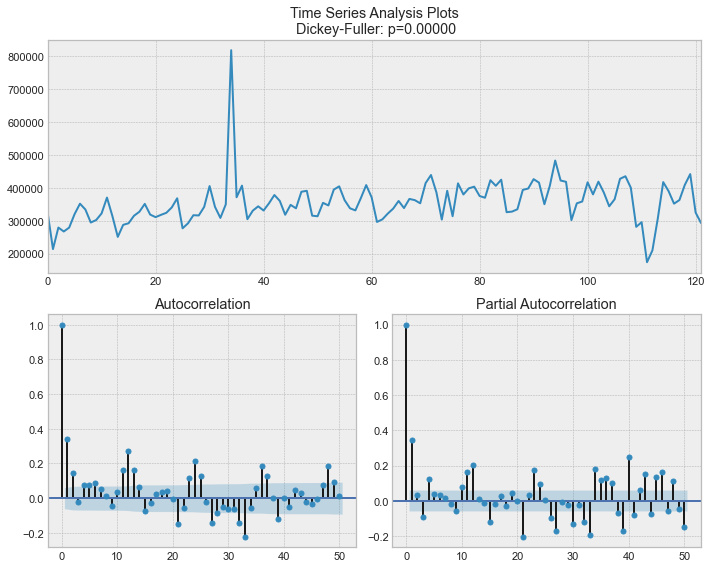

In [29]:
tsplot(df_imports["total_merchandise_imports_clothing&footwear"])

### Total Plastic Imports

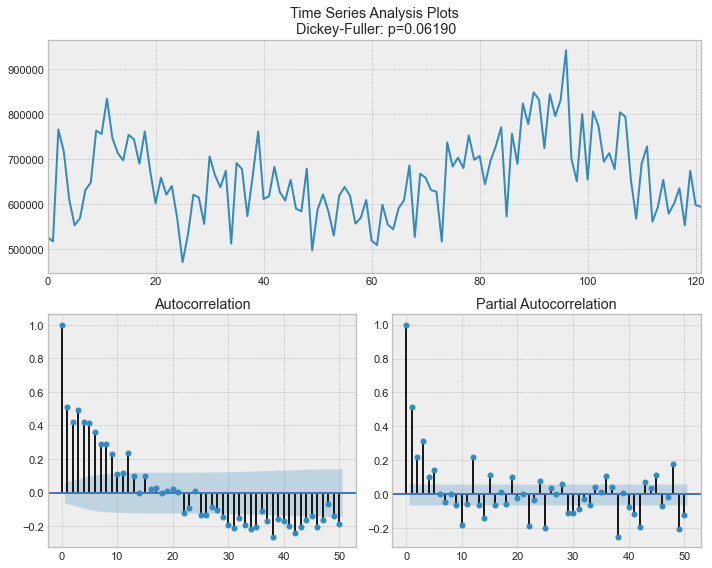

In [30]:
tsplot(df_imports["total_merchandise_imports_plastics"])

## After Log Transformation


In [31]:
focused_columns = ['neer', 'total_merchandise_imports_food','total_merchandise_imports_clothing&footwear','total_merchandise_imports_plastics']
for column in focused_columns:
    if column in df_imports.columns.values.tolist():
        df_imports[column] = np.log(df_imports[column]+1) 

### Total Food Imports (Log)

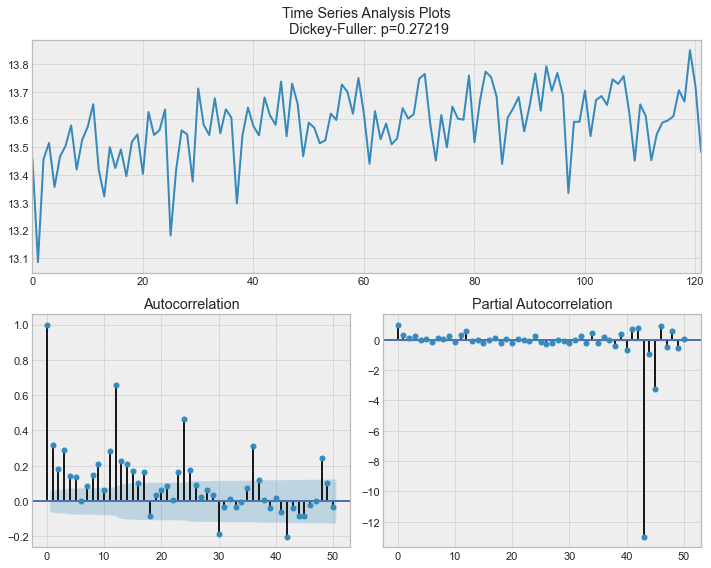

In [32]:
tsplot(df_imports["total_merchandise_imports_food"])

### Total Clothing and Footwear Imports (Log)

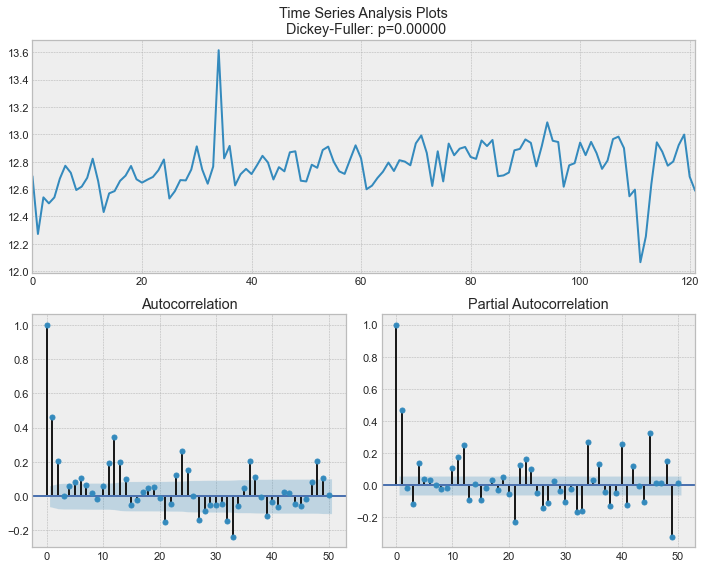

In [33]:
tsplot(df_imports["total_merchandise_imports_clothing&footwear"])

### Total Plastic Imports (Log)

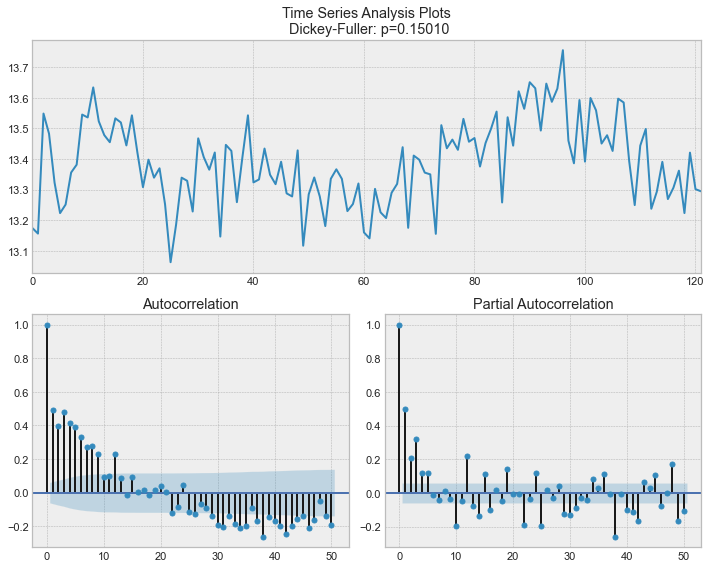

In [34]:
tsplot(df_imports["total_merchandise_imports_plastics"])

## After Differencing

In [35]:
focused_columns_diff = ['neer','total_merchandise_imports_food', 'total_merchandise_imports_plastics']

for column in focused_columns:
    if column in df_imports.columns.values.tolist():
        df_imports[column] = df_imports[column].diff().dropna()

In [36]:
df_imports = df_imports.dropna()

In [37]:
df_imports.head()

date      neer  total_merchandise_imports_food  \
1 2021-02-11  0.002636                       -0.372086   
2 2021-03-11  0.000475                        0.371155   
3 2021-04-11  0.007588                        0.058101   
4 2021-05-11  0.004288                       -0.158563   
5 2021-06-11  0.003085                        0.110495   

   total_merchandise_imports_clothing&footwear  \
1                                    -0.422448   
2                                     0.267706   
3                                    -0.043883   
4                                     0.043421   
5                                     0.137128   

   total_merchandise_imports_plastics  
1                           -0.017946  
2                            0.392058  
3                           -0.065778  
4                           -0.159678  
5                           -0.099677

### Total Food Imports (Log + Diff)

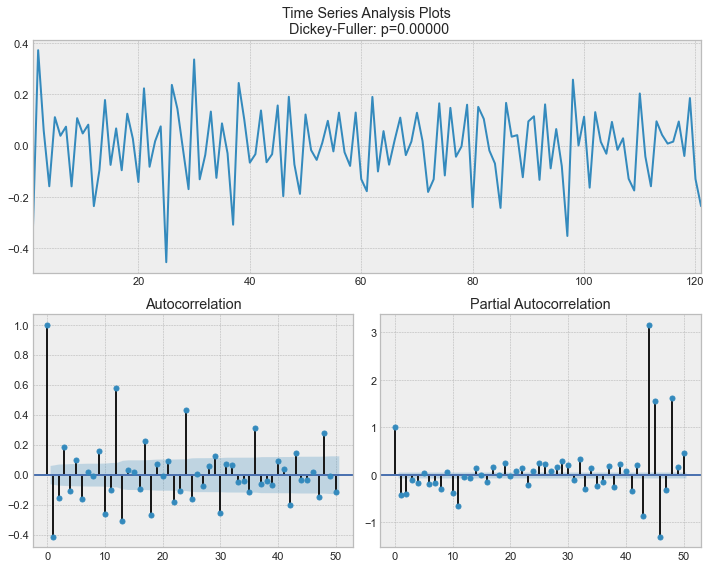

In [38]:
tsplot(df_imports["total_merchandise_imports_food"])

### Total Plastic Imports (Log + Diff)

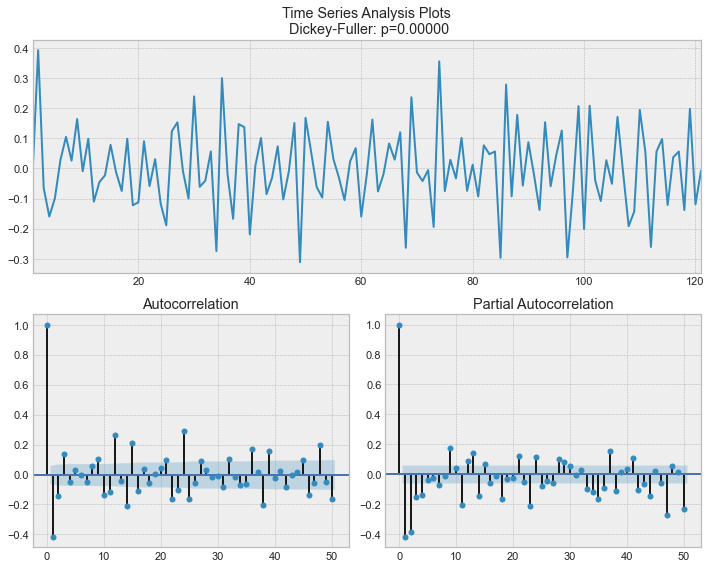

In [39]:
tsplot(df_imports["total_merchandise_imports_plastics"])

In [40]:
model = VAR(df_imports[focused_columns])
print(model.select_order(10).summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -22.79      -22.69   1.264e-10      -22.75
1       -23.30     -22.81*   7.637e-11      -23.10
2       -23.54      -22.66   6.007e-11     -23.18*
3       -23.62      -22.35  5.571e-11*      -23.10
4       -23.59      -21.93   5.772e-11      -22.91
5       -23.59      -21.54   5.785e-11      -22.76
6       -23.50      -21.05   6.454e-11      -22.50
7       -23.42      -20.58   7.120e-11      -22.27
8      -23.66*      -20.44   5.713e-11      -22.35
9       -23.60      -19.99   6.259e-11      -22.13
10      -23.56      -19.56   6.783e-11      -21.94
--------------------------------------------------


In [41]:
orders = [1, 2, 3, 8]
for o in orders:
    print(f'Order: {o}')
    results = model.fit(o)
    print(results.is_stable())
    print(results.test_whiteness())
    print()


Order: 1
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 234.545, critical value: 173.004>, p-value: 0.000>

Order: 2
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 194.899, critical value: 155.405>, p-value: 0.000>

Order: 3
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 137.626, critical value: 137.701>, p-value: 0.050>

Order: 8
True
<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 81.050, critical value: 46.194>, p-value: 0.000>



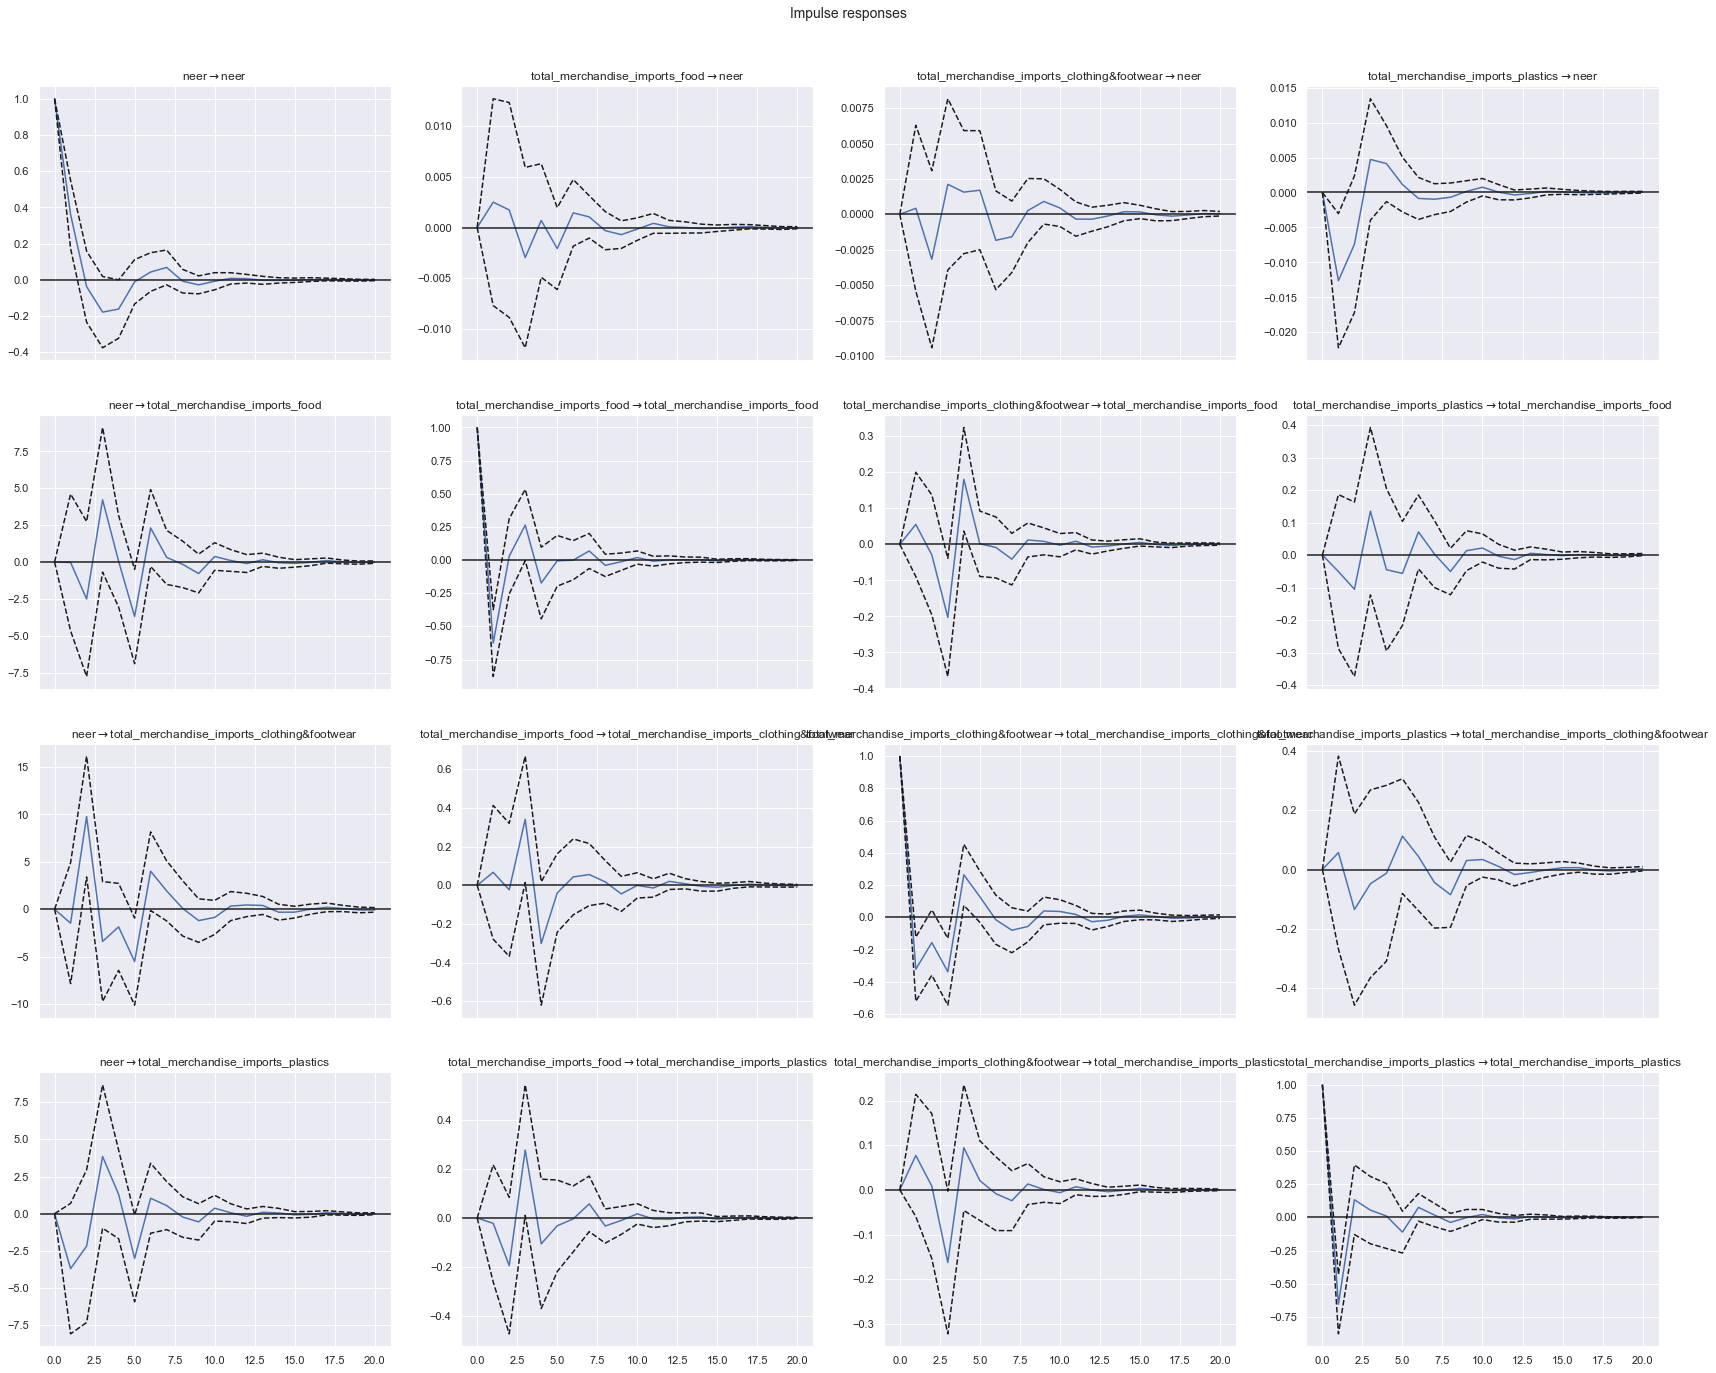

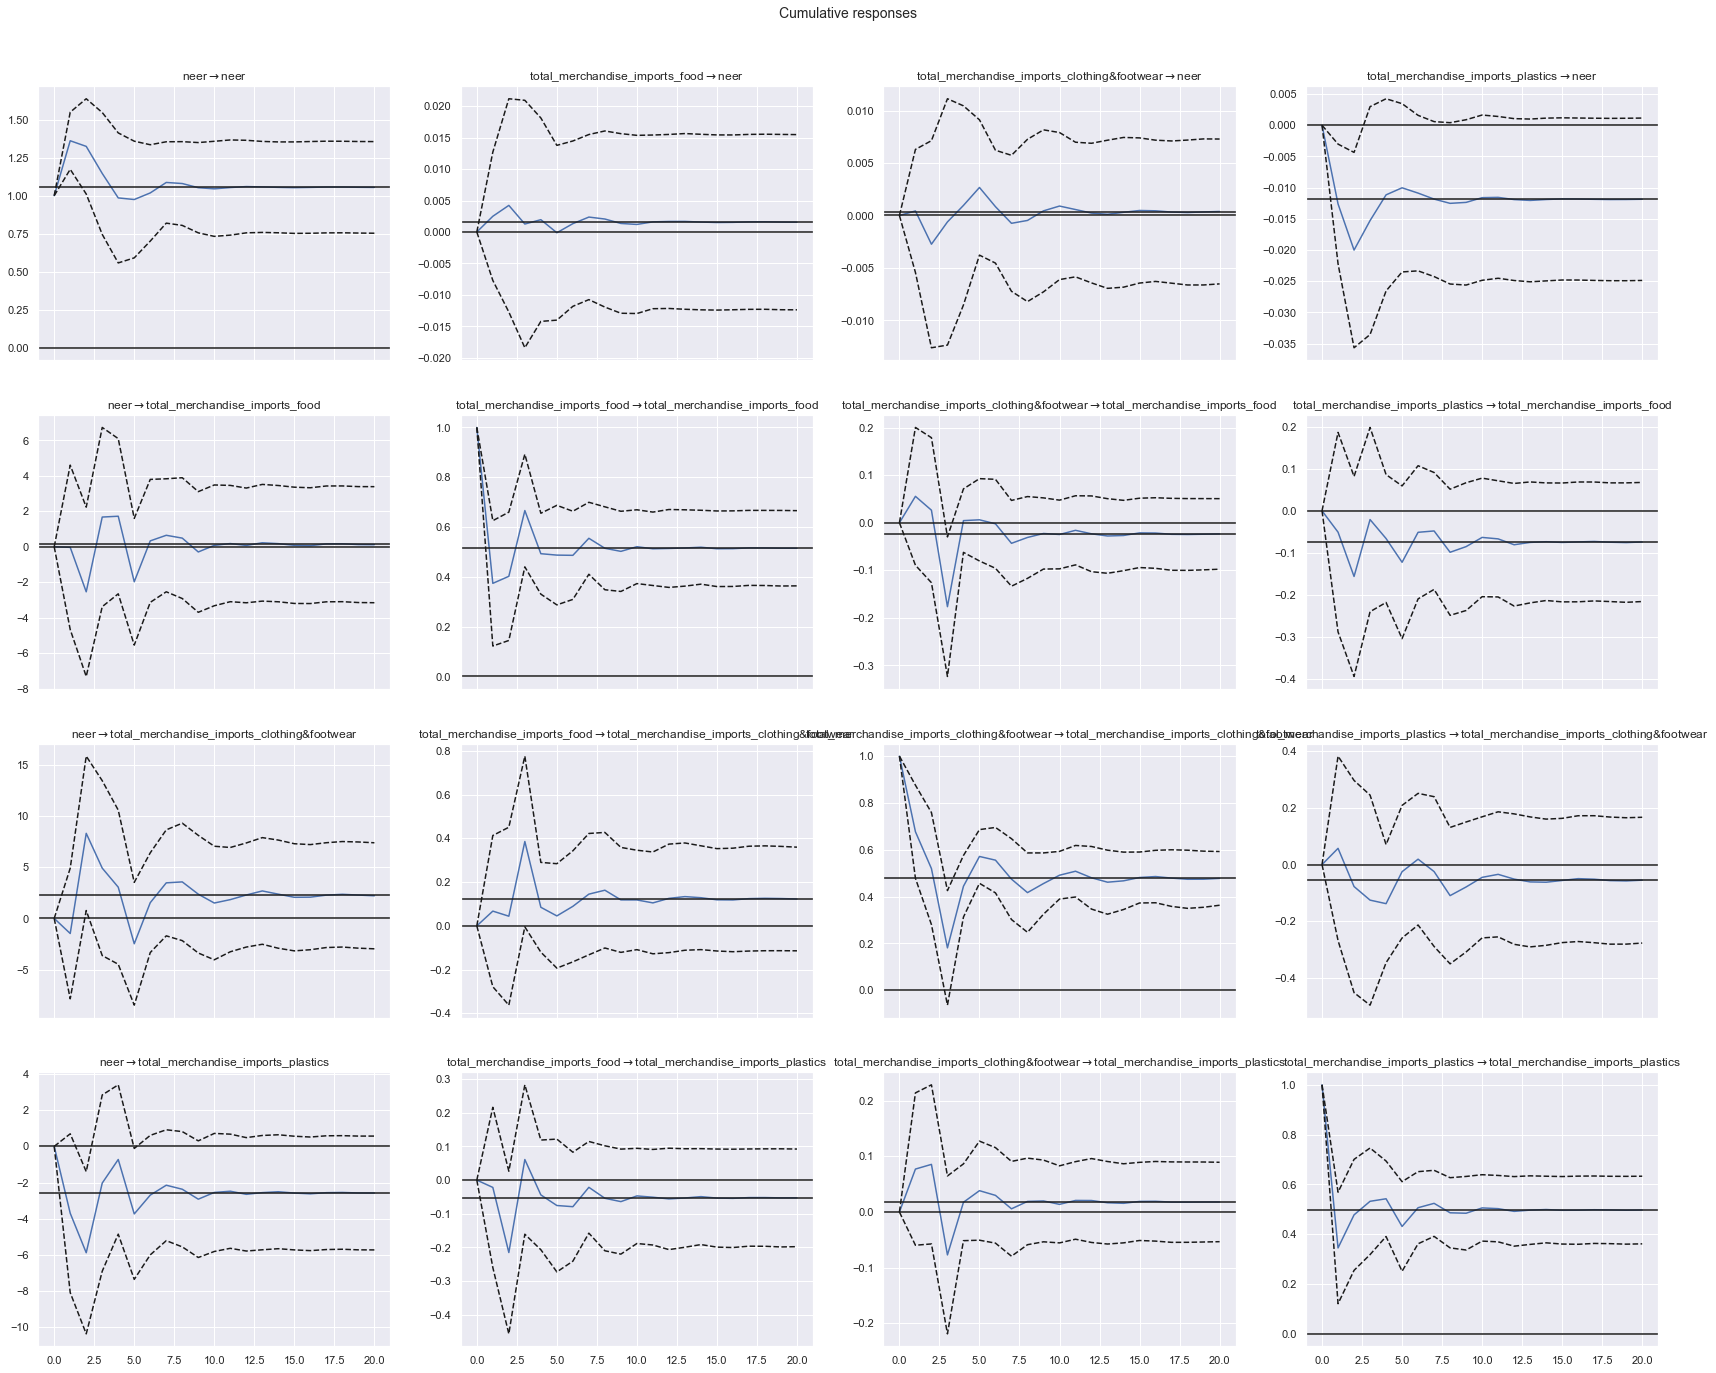

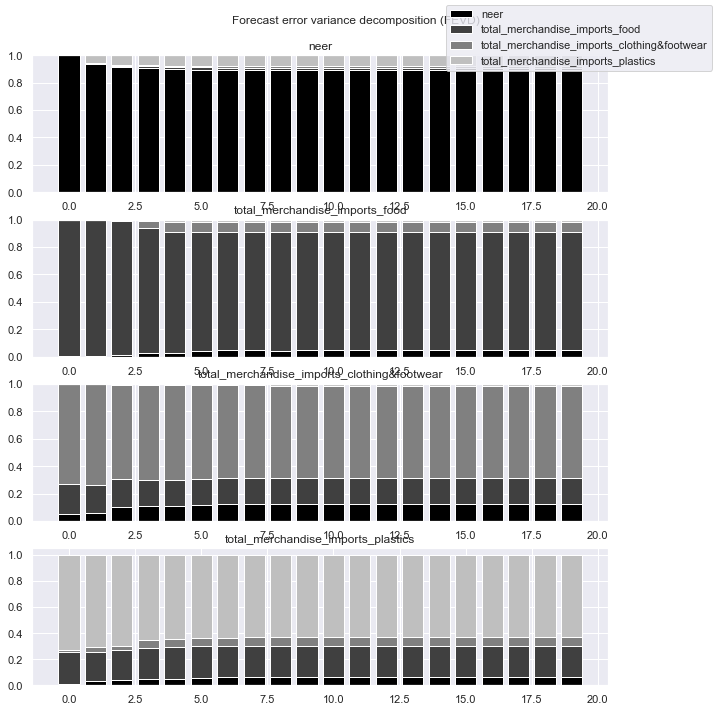

In [42]:
selecteed_order = 3
results = model.fit(selecteed_order,trend="c")
results_file = 'results_imports_lag'+str(selecteed_order)+'.txt'
structual_file = 'imports_lag'+str(selecteed_order)
columns = df_imports[focused_columns].columns.values.tolist()
write_results(results_file, results, columns)
structural_analyses(structual_file, results, 20)